<a href="https://colab.research.google.com/github/shyama21/ml_assignment/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **Libraries**

In [0]:
from math import sqrt

import numpy as np
import pandas as pd

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Read the Data**

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Jee.csv to Jee.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Jee.csv']))

**Head of the dataframe**

In [13]:
data.head()

,Marks,Rank
0,185,8286
1,192,7055
2,267,877
3,125,32559
4,86,80665


**Describing the data**

In [14]:
data.describe()

,Marks,Rank
count,56.000000,56.000000
mean,160.392857,54394.339286
std,74.983799,92594.205889
min,34.000000,1.000000
25%,94.750000,4872.500000
50%,166.000000,13208.000000
75%,207.000000,66393.000000
max,350.000000,463000.000000


In [15]:
data.count()

Marks    56
Rank     56
dtype: int64

**Checking the missing value**

In [17]:
data.isnull().sum()

Marks    0
Rank     0
dtype: int64

## **Outliers Detection**

In [19]:
Q1 = data['Marks'].quantile(0.25)
Q3 = data['Marks'].quantile(0.75)
iqr = Q3-Q1
lower_bound = Q1 - (1.5 * iqr)
upper_bound = Q3 + (1.5 * iqr)
df = data[(data['Marks']>upper_bound) | (data['Marks']<lower_bound)]
df

,Marks,Rank


**Marks variable has no outliers**

In [20]:
Q1 = data['Rank'].quantile(0.25)
Q3 = data['Rank'].quantile(0.75)
iqr = Q3-Q1
lower_bound = Q1 - (1.5 * iqr)
upper_bound = Q3 + (1.5 * iqr)
df = data[(data['Rank']>upper_bound) | (data['Rank']<lower_bound)]
df

,Marks,Rank
13,53,224699
15,34,463000
20,57,192769
47,57,192769
54,37,399007
55,57,192769


**Rank variable has outliers**

**Boxplot for Rank Variable**


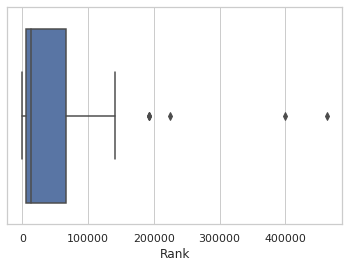

In [21]:
ax = sns.boxplot(x=data["Rank"])
plt.show(ax)

**Scatterplot**



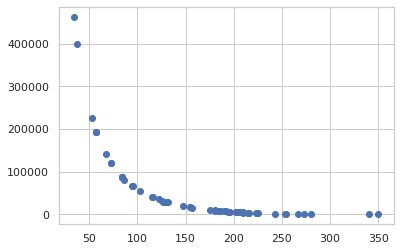

In [22]:
plt.scatter(data["Marks"],data["Rank"])
plt.show()

**Non Linear relationship between two variables**

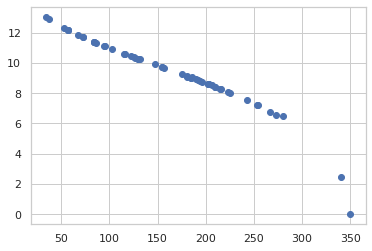

In [23]:
plt.scatter(data["Marks"],np.log(data["Rank"]))
plt.show()

**Linear relationship b/n marks and log(rank)**

**Pearson Correlation Coefficient**

In [25]:
corr,_ = pearsonr(data["Marks"],np.log(data["Rank"]))
print("Pearson correlation: %3f" % corr)

Pearson correlation: -0.958281


**Creating feature and target dataframes**

In [0]:
X = data.iloc[:,:-1].values
y = np.log(data.iloc[:,1].values)

**Divide the data into train and test split**

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

**Fitting linear regression model**

In [32]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predictions on test data**

In [0]:
y_pred = regressor.predict(X_test)

## **plotting actual vs predicted values plot**

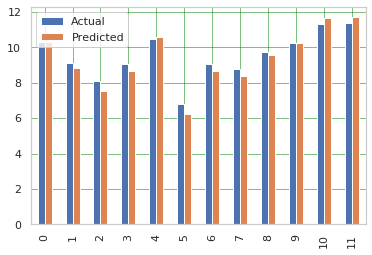

In [35]:
df1 = pd.DataFrame({'Actual': y_test.flatten(),"Predicted":y_pred.flatten()})
df1.plot(kind='bar')
plt.grid(which = 'major',linestyle='-',linewidth='0.5',color = 'green')
plt.grid(which = 'minor',linestyle=':',linewidth='0.5',color = 'black')
plt.show()

### **Model Evaluation Metrics**

**MAPE FUNCTION**

In [0]:
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
mean_absolute_percentage_error(y_test.flatten(),y_pred.flatten())

3.348457430636226

**RMSE**

In [44]:
rmse = sqrt(mean_squared_error(y_test.flatten(),y_pred.flatten()))
print(rmse)

0.34414910322664405
